Data Analysis and Modeling

Imports libraries for financial data, data manipulation, visualization, and modeling:
- Quandl, pandas, numpy, matplotlib, seaborn, sklearn, statsmodels

In [24]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error,r2_score

Retrieve and Save Google Stock Data

Fetches Google stock data from Quandl and saves it to a CSV file.

In [25]:
#df = quandl.get('WIKI/GOOGL')
#df.to_csv("data/GOOGL.csv")

Load and Inspect Google Stock Data 

Loads Google stock data from a CSV file and displays its information.

In [26]:
df = pd.read_csv("data/GOOGL.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3424 non-null   object 
 1   Open         3424 non-null   float64
 2   High         3424 non-null   float64
 3   Low          3424 non-null   float64
 4   Close        3424 non-null   float64
 5   Volume       3424 non-null   float64
 6   Ex-Dividend  3424 non-null   float64
 7   Split Ratio  3424 non-null   float64
 8   Adj. Open    3424 non-null   float64
 9   Adj. High    3424 non-null   float64
 10  Adj. Low     3424 non-null   float64
 11  Adj. Close   3424 non-null   float64
 12  Adj. Volume  3424 non-null   float64
dtypes: float64(12), object(1)
memory usage: 347.9+ KB


Converts the "Date" column in the DataFrame to datetime format.

In [27]:
df["Date"] = pd.to_datetime(df["Date"])

Resample and Interpolate Stock Data

Sets the "Date" column as the index, resamples the data to daily frequency,
interpolates missing values, and displays the updated DataFrame information.

In [28]:
data = df.set_index("Date")["Adj. Close"]
data = data.resample("D").mean()
data = data.interpolate(method='linear')
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4969 entries, 2004-08-19 to 2018-03-27
Freq: D
Series name: Adj. Close
Non-Null Count  Dtype  
--------------  -----  
4969 non-null   float64
dtypes: float64(1)
memory usage: 77.6 KB


Plot Stock Data

Creates a line plot of the resampled and interpolated stock data with a figure size of 20x10 inches.


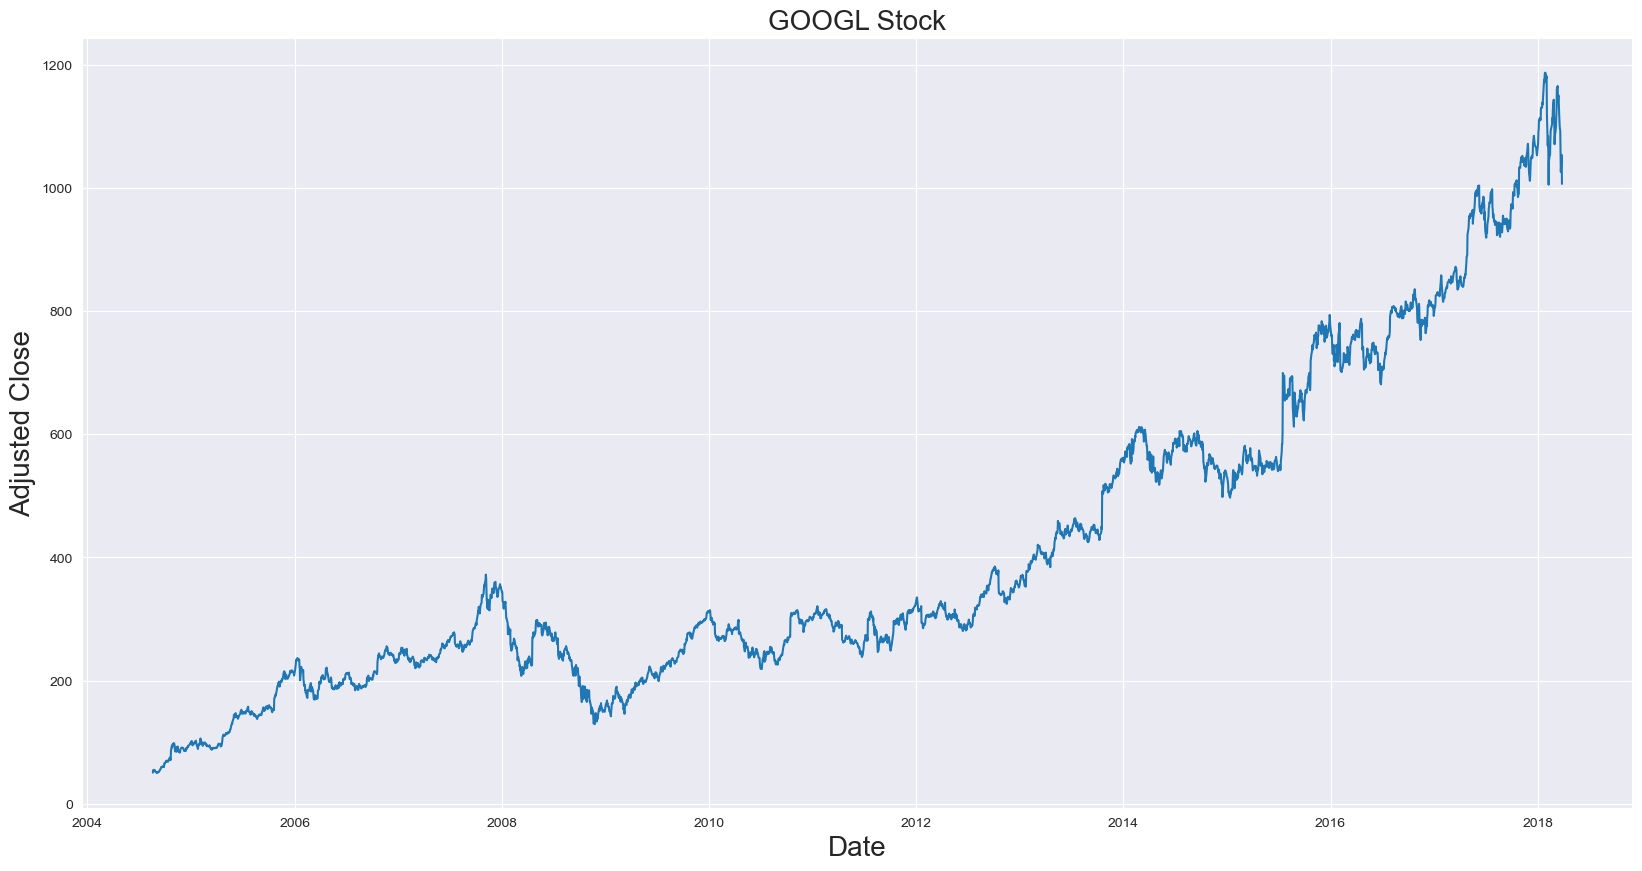

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(data)
plt.title("GOOGL Stock",size=20)
plt.xlabel("Date",size=20)
plt.ylabel("Adjusted Close",size=20)
plt.savefig("img/GOOGL.png")

Plot Segmented Stock Data

Creates a line plot of segmented stock data with three ranges:
- 4 to 11
- 10 to 18
- 17 to 25


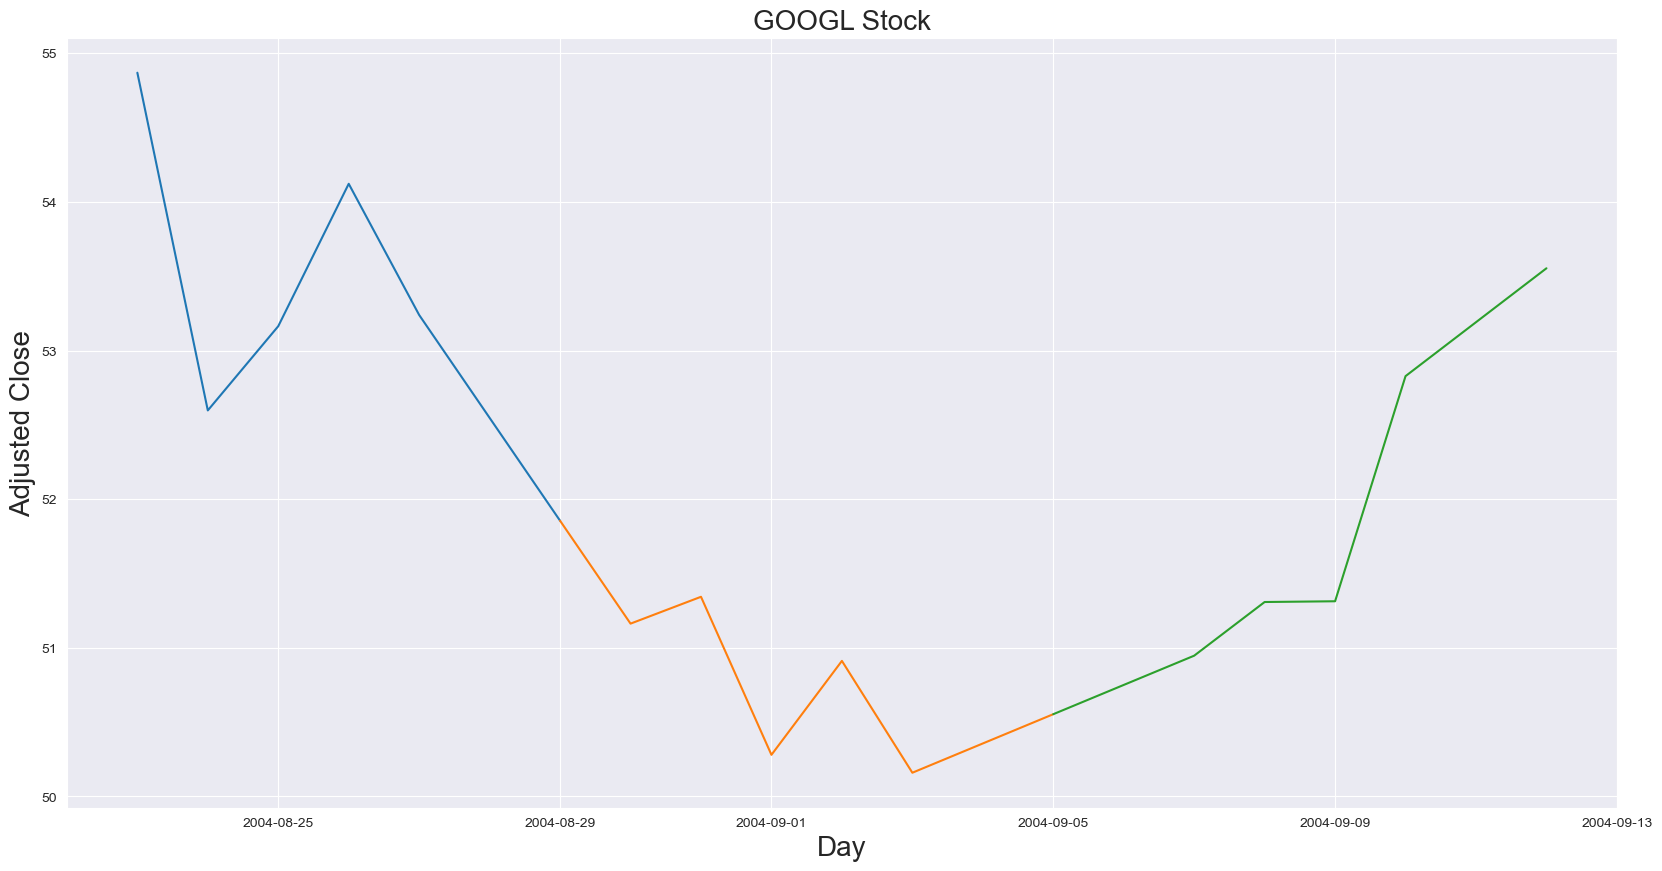

In [30]:
plt.figure(figsize=(20, 10))
plt.plot(data[4:11])
plt.plot(data[10:18])
plt.plot(data[17:25])
plt.title("GOOGL Stock",size=20)
plt.xlabel("Day",size=20)
plt.ylabel("Adjusted Close",size=20)
plt.savefig("img/GOOGL_Day.png")

Extract Date Features

Resets the index, and extracts day, week, day of the week, month, quarter, and year from the "Date" column.


In [31]:
data = data.reset_index("Date")
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data['Year'] = data['Date'].dt.year

Create Boxplots of Stock Data
Generates a 3x2 grid of boxplots to visualize the distribution of "Adj. Close" across different features:
- Day
- Day of the Week
- Week
- Month
- Quarter
- Year

<Axes: xlabel='Year', ylabel='Adj. Close'>

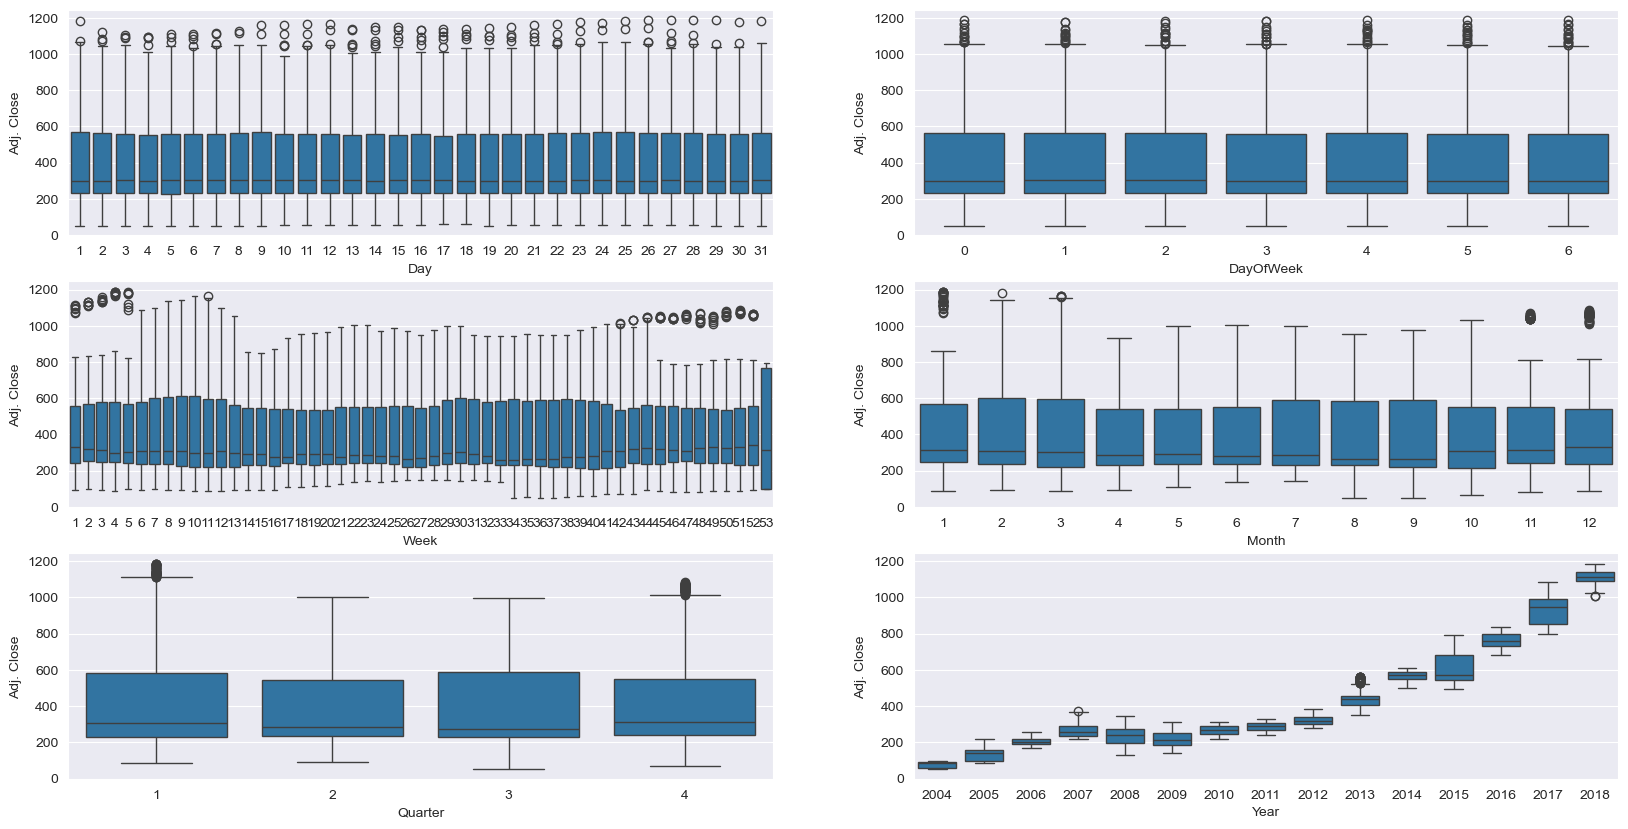

In [32]:
fig, ax = plt.subplots(3,2,figsize=(20, 10))
sns.boxplot(x="Day", y="Adj. Close", data=data,ax=ax[0,0])
sns.boxplot(x="DayOfWeek", y="Adj. Close", data=data,ax=ax[0,1])
sns.boxplot(x="Week", y="Adj. Close", data=data,ax=ax[1,0])
sns.boxplot(x="Month", y="Adj. Close", data=data,ax=ax[1,1])
sns.boxplot(x="Quarter", y="Adj. Close", data=data,ax=ax[2,0])
sns.boxplot(x="Year", y="Adj. Close", data=data,ax=ax[2,1])

## Correlation Heatmap

The heatmap below displays the correlation matrix of the features in the dataset. Each cell represents the correlation coefficient between two features, ranging from -1 to 1. Positive values indicate a positive correlation, negative values indicate a negative correlation, and values close to 0 suggest little to no correlation.

- **Diagonal Elements**: Always 1, representing the correlation of each feature with itself.
- **Strong Correlations**: High absolute values (close to 1 or -1) indicate strong relationships between features.
- **Weak Correlations**: Values close to 0 suggest weak or no linear relationship between features.

The annotations in the heatmap show the correlation coefficients to two decimal places.


<Axes: >

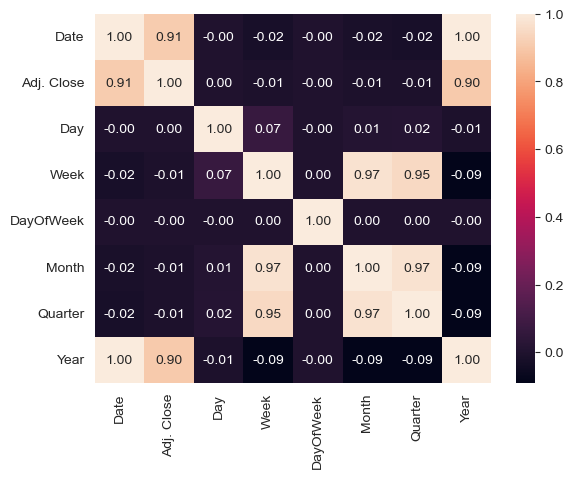

In [33]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')

Seasonal Decomposition of Stock Data

This code performs seasonal decomposition on annual resampled stock data to extract and visualize the following components:
- **Original**: The original time series data.
- **Trend**: The underlying trend component extracted from the data.
- **Seasonal**: The repeating seasonal pattern observed in the data.
- **Residual**: The residuals or noise remaining after removing the trend and seasonal components.

The results are displayed in a 4-panel plot, with each subplot representing one of the components of the decomposition.


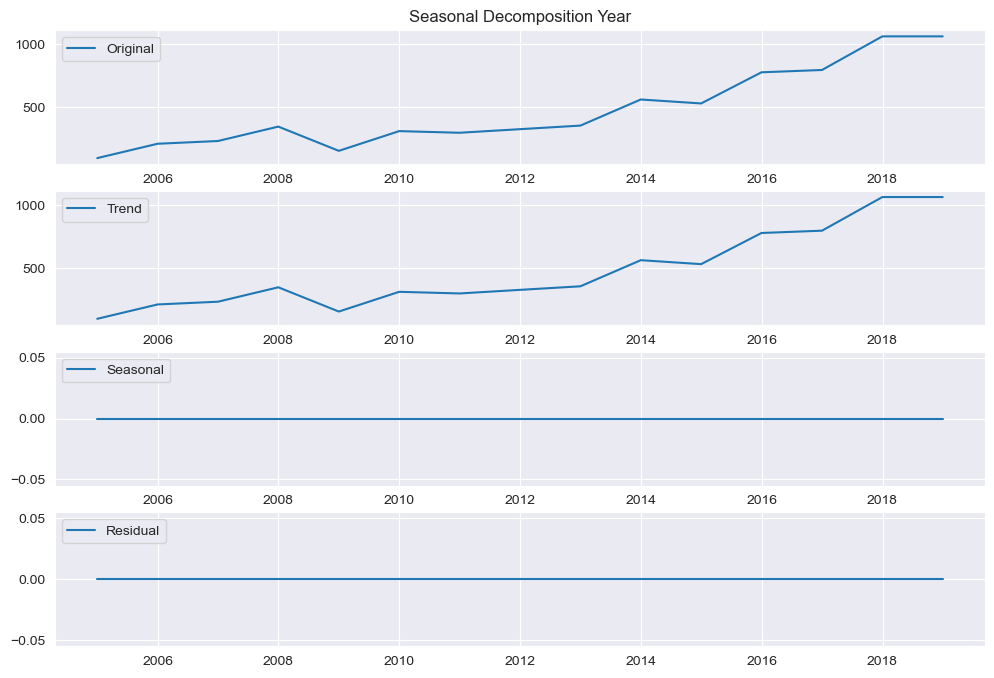

In [34]:
YearDecompose= data[["Date","Adj. Close"]].copy()
YearDecompose.set_index("Date",inplace=True)

YearDecompose = YearDecompose.resample("Y")
YearDecompose = YearDecompose.interpolate(method='linear')

Ydecomposition = seasonal_decompose(YearDecompose, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(YearDecompose['Adj. Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition Year')

plt.subplot(4, 1, 2)
plt.plot(Ydecomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(Ydecomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(Ydecomposition.resid, label='Residual')
plt.legend(loc='upper left')


Quarterly Seasonal Decomposition of Stock Data

This code performs seasonal decomposition on stock data resampled to a quarterly frequency to extract and visualize the following components:
- **Original**: The original time series data.
- **Trend**: The underlying trend component of the data.
- **Seasonal**: The repeating seasonal pattern observed in the data.
- **Residual**: The residuals or noise remaining after removing the trend and seasonal components.

The results are displayed in a 4-panel plot, with each subplot showing one of the components of the decomposition.


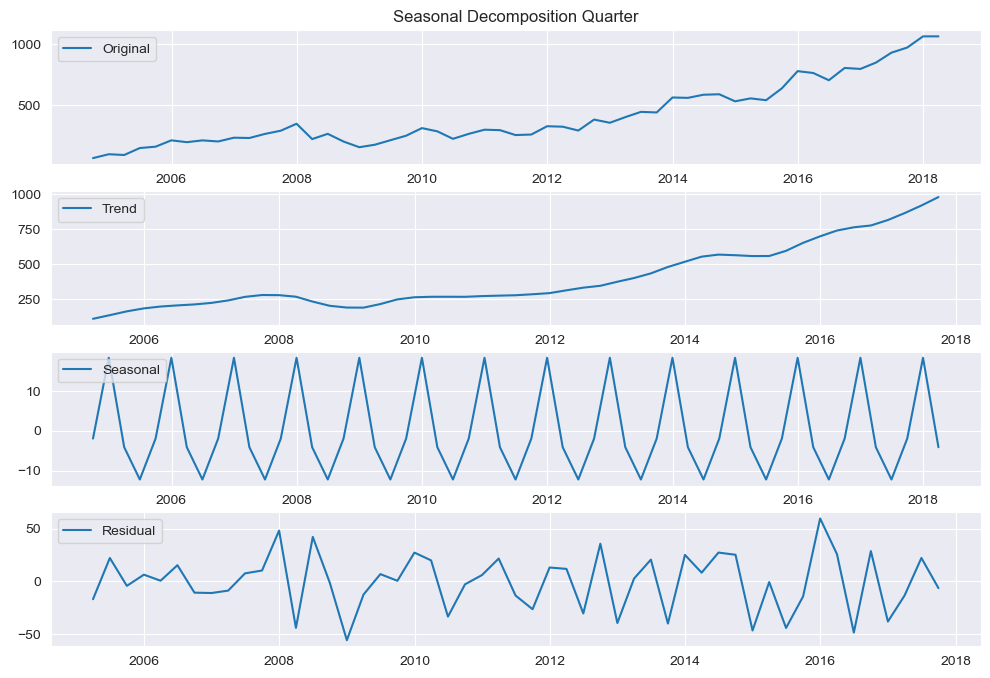

In [35]:
QuarterDecompose= data[["Date","Adj. Close"]].copy()
QuarterDecompose.set_index("Date",inplace=True)

QuarterDecompose = QuarterDecompose.resample("Q")
QuarterDecompose = QuarterDecompose.interpolate(method='linear')

Qdecomposition = seasonal_decompose(QuarterDecompose, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(QuarterDecompose['Adj. Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition Quarter')

plt.subplot(4, 1, 2)
plt.plot(Qdecomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(Qdecomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(Qdecomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.savefig("img/Seasonal Decomposition Quarter.png")


Weekly Seasonal Decomposition of Stock Data

This code performs seasonal decomposition on stock data resampled to a weekly frequency to extract and visualize the following components:
- **Original**: The original time series data.
- **Trend**: The underlying trend component observed in the data.
- **Seasonal**: The repeating seasonal pattern detected in the data.
- **Residual**: The residuals or noise remaining after removing the trend and seasonal components.

The results are presented in a 4-panel plot, with each subplot illustrating one of the components of the decomposition.


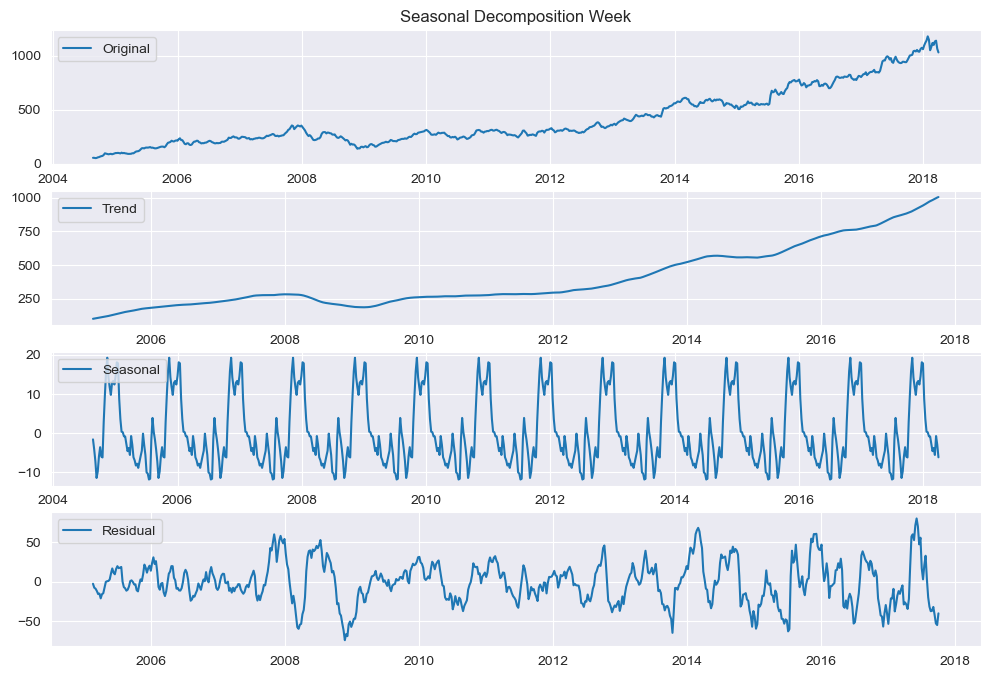

In [36]:
WeekDecompose= data[["Date","Adj. Close"]].copy()
WeekDecompose.set_index("Date",inplace=True)

WeekDecompose = WeekDecompose.resample("w").mean()
WeekDecompose = WeekDecompose.interpolate(method='linear')
Wdecomposition = seasonal_decompose(WeekDecompose, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(WeekDecompose['Adj. Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition Week')

plt.subplot(4, 1, 2)
plt.plot(Wdecomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(Wdecomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(Wdecomposition.resid, label='Residual')
plt.legend(loc='upper left')


Monthly Seasonal Decomposition of Stock Data

This code performs seasonal decomposition on stock data resampled to a monthly frequency to extract and visualize the following components:
- **Original**: The original time series data.
- **Trend**: The underlying trend component in the data.
- **Seasonal**: The repeating seasonal pattern in the data.
- **Residual**: The residuals or noise remaining after removing the trend and seasonal components.

The results are displayed in a 4-panel plot, with each subplot showing one of the components of the decomposition, specifically tailored for monthly data.


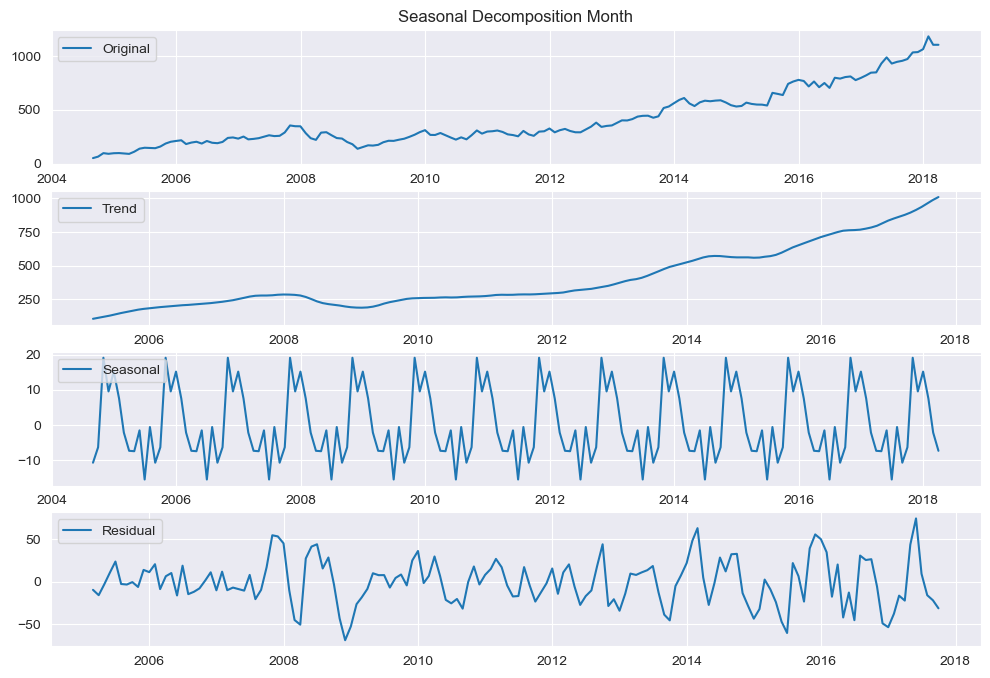

In [37]:
MonthDecompose= data[["Date","Adj. Close"]].copy()
MonthDecompose.set_index("Date",inplace=True)

MonthDecompose = MonthDecompose.resample("M")
MonthDecompose = MonthDecompose.interpolate(method='linear')

Mdecomposition = seasonal_decompose(MonthDecompose, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(MonthDecompose['Adj. Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition Month')

plt.subplot(4, 1, 2)
plt.plot(Mdecomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(Mdecomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(Mdecomposition.resid, label='Residual')
plt.legend(loc='upper left')

Linear Regression Model for Stock Price Prediction

This code performs the following steps:
- **Feature Engineering**: Creates a lagged feature `T-1` representing the previous day’s stock price.
- **Data Preparation**: Splits the dataset into training and testing sets, using features including `Week`, `Month`, `Year`, and `T-1 True Value`.
- **Model Training**: Fits a linear regression model to the training data.
- **Visualization**: Plots the actual and predicted stock prices for both training and testing datasets.
- **Evaluation**: Prints the model's R-squared score and mean squared error on the test set.

The plot shows the train data, test data, and model predictions, providing a visual comparison of the model’s performance.


0.9975406011809743
73.88665042370428


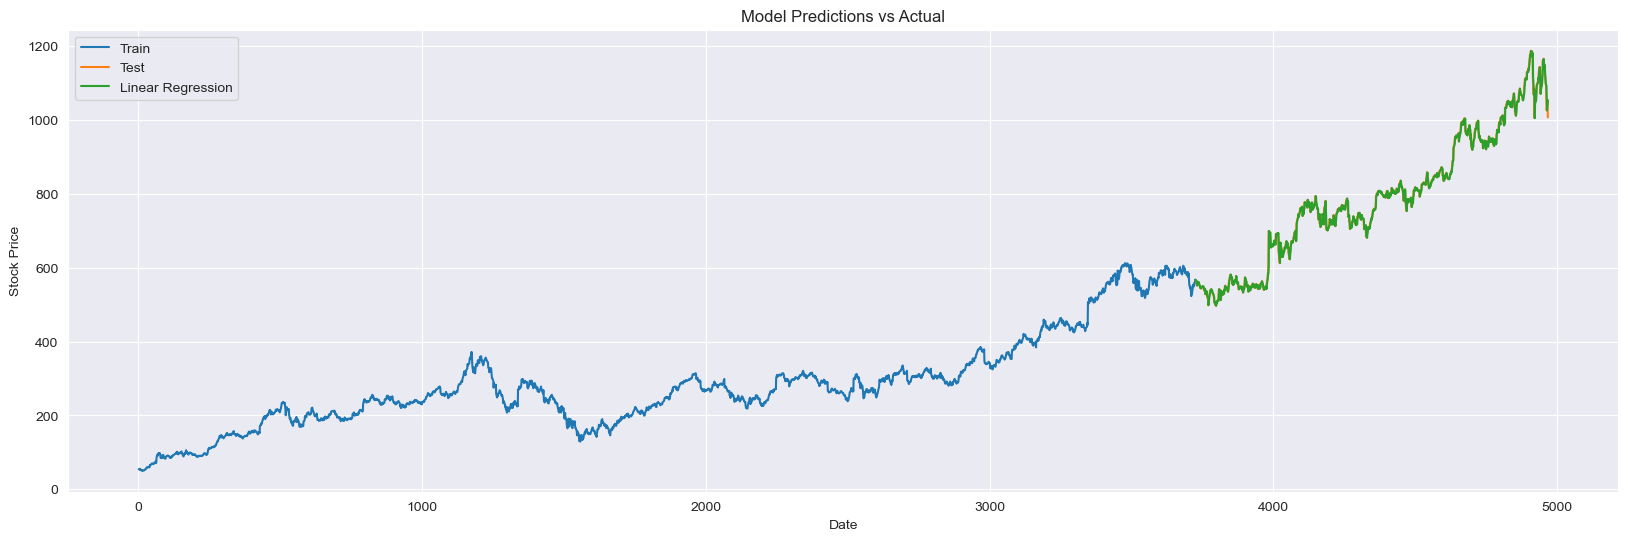

In [38]:
data["T-1"] = data["Adj. Close"].shift(1)
train_data = data.iloc[1:]
x = train_data[["Week","Month","Year",'T-1']]
y = train_data["Adj. Close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False)

model = linear_model.LinearRegression()
model.fit(x_train,y_train)

plt.figure(figsize=(20, 6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, model.predict(x_test), label='Linear Regression')

plt.legend()
plt.title('Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
print(model.score(x_test,y_test))
print(mean_squared_error(y_test,model.predict(x_test)))

Iterative Linear Regression Prediction and Update

This code performs an iterative prediction and updating process using linear regression:
- **Feature Engineering**: Creates a lagged feature `T-1` and removes missing values.
- **Data Preparation**: Splits the dataset into training and testing sets, with the training set comprising 80% of the data, using features including `Week`, `Month`, `Year`, and `T-1 Predicted Value`.
- **Model Training**: Trains a linear regression model on the training data.
- **Iterative Prediction**: For each test instance, predicts the stock price and updates the model with the new data point. This process is repeated for all test instances.
- **Results Compilation**: Combines the actual and predicted stock prices into a results DataFrame for comparison.

The final results include the actual and predicted stock prices for the test set, providing a view of the model’s iterative prediction performance.


In [39]:
data["T-1"] = data["Adj. Close"].shift(1)
data = data.dropna()
train_data = data.iloc[1:]
train_size = int(len(train_data) * 0.8)
test_size = len(train_data) - train_size

x_train = train_data[["Week", "Month", "Year", 'T-1']][:train_size]
y_train = train_data["Adj. Close"][:train_size]

model = linear_model.LinearRegression()

model.fit(x_train.values, y_train)

predictions = []
updated_x = x_train.copy()
updated_y = y_train.copy()

for i in range(test_size):
    next_row = train_data[["Week", "Month", "Year", 'T-1']].iloc[len(updated_x)].values.reshape(1, -1)
    prediction = model.predict(next_row)
    predictions.append(prediction[0])

    new_row_df = pd.DataFrame([train_data[["Week", "Month", "Year", 'T-1']].iloc[len(updated_x)].values],
                              columns=["Week", "Month", "Year", 'T-1'])
    new_y_df = pd.Series([prediction[0]], index=[train_data.index[len(updated_x)]])

    updated_x = pd.concat([updated_x, new_row_df], ignore_index=True)
    updated_y = pd.concat([updated_y, new_y_df], ignore_index=True)

    model.fit(updated_x.values, updated_y)

predictions_df = pd.DataFrame(predictions, columns=['Prediction'])

test_data = train_data.iloc[train_size:].reset_index(drop=True)
results = pd.concat([test_data[['Adj. Close']].reset_index(drop=True), predictions_df], axis=1)

Evaluate Model Performance

Calculates and prints the performance metrics for the linear regression model:
- **Mean Squared Error (MSE)**: Measures the average squared difference between the actual and predicted stock prices.
- **R-squared (R²)**: Represents the proportion of variance in the stock prices that is predictable from the features.

The printed metrics provide an indication of how well the model performs on the test data.

In [40]:
mse = mean_squared_error(results['Adj. Close'], results['Prediction'])
r2 = r2_score(results['Adj. Close'], results['Prediction'])

# Print metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")

Mean Squared Error (MSE): 85.92098620351938
R-squared (R²): 0.9955379490281725


Plot Actual vs. Predicted Stock Prices

This code creates a plot comparing actual stock prices from the training set with predicted stock prices from the iterative model:
- **Actual Prices**: Shown for the training data.
- **Predicted Prices**: Shown in red for the test data predictions.

The plot visualizes how well the model's predictions match the actual stock prices, with grid lines for better readability.

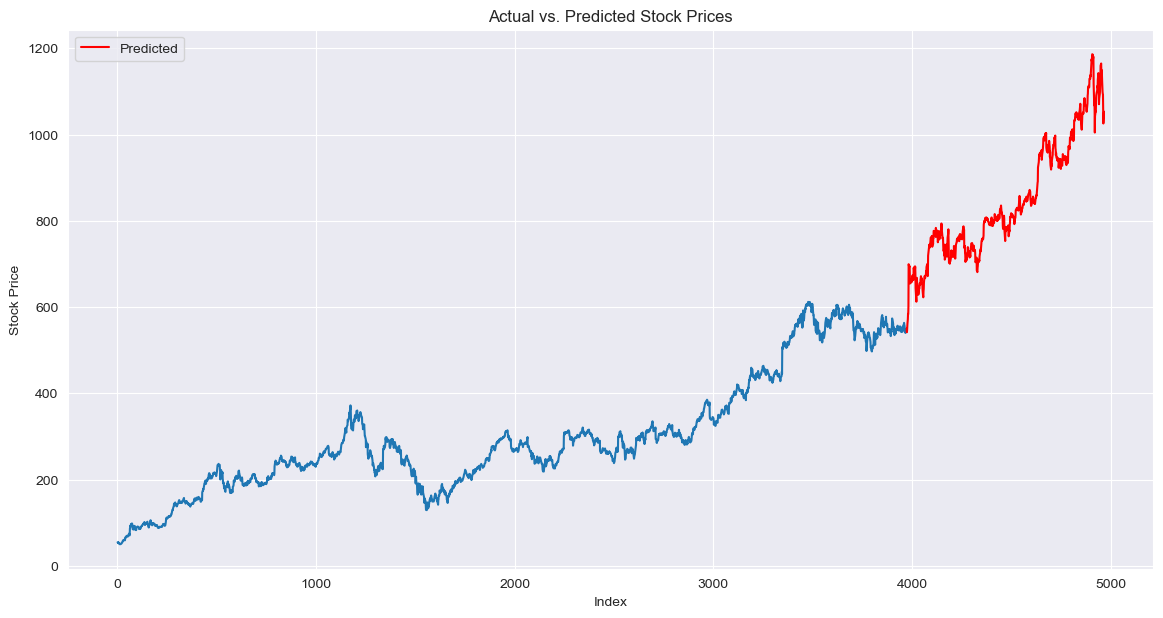

In [45]:
plt.figure(figsize=(14, 7))
plt.plot(y_train)
plt.plot(range(len(y_train),len(y_train)+len(results)),results['Prediction'], label='Predicted', color='red')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.savefig("img/Predicted Stock.png")


Plot Actual vs. Predicted Stock Prices

This code generates a plot comparing actual and predicted stock prices for the test set:
- **Actual Prices**: Shown in blue for the test data.
- **Predicted Prices**: Shown in red for the model's predictions.

Both series are plotted against the same index range, providing a visual comparison of the model's performance.

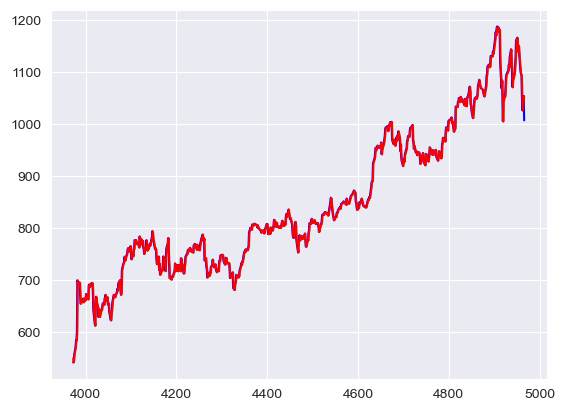

In [42]:
plt.plot(range(len(y_train),len(y_train)+len(results)),results['Adj. Close'], label='Actual', color='blue')
plt.plot(range(len(y_train),len(y_train)+len(results)),results['Prediction'], label='Predicted', color='red')